In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1577750400&interval=1d&events=history'
df=pd.read_csv(url, header=0, parse_dates=True, index_col='Date') # header=0 takes the first line as column headers
df= df.dropna(how='any') #to drop NaN rows and columns
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,12235.450195,12287.150391,12213.250000,12262.750000,12262.750000,600.0
2019-12-24,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,500.0
2019-12-26,12211.849609,12221.549805,12118.849609,12126.549805,12126.549805,500.0
2019-12-27,12172.900391,12258.450195,12157.900391,12245.799805,12245.799805,400.0
2019-12-30,12274.900391,12286.450195,12213.799805,12255.849609,12255.849609,400.0


### Bollinger Bands

In [4]:
df['SMA20']= df['Close'].rolling(20).mean()
df['StdDev']= df['Close'].rolling(20).std()
df['UpperBand']= df['SMA20']+2*df['StdDev']
df['LowerBand']=df['SMA20']-2*df['StdDev']

(5576.480078400001, 13498.979785500002)

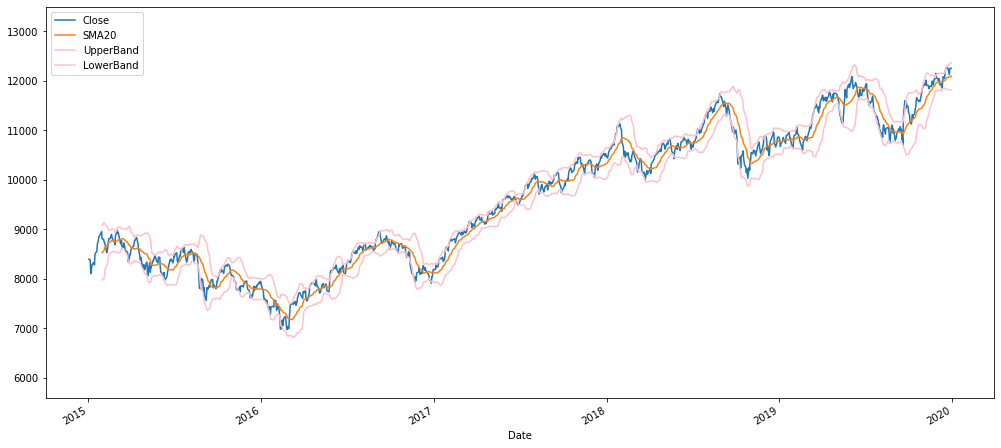

In [10]:
ax=df['Close'].plot(legend=True)
df['SMA20'].plot(ax=ax, legend=True)
df['UpperBand'].plot(ax=ax, legend=True,color='pink')
df['LowerBand'].plot(ax=ax,legend=True, figsize=(17,8),color='pink')
axes = plt.gca() #get current axes
axes.set_ylim([df['Close'].min()*0.8, df['Close'].max()*1.1])

In [6]:
df['Buy']=(df['Close']>df['UpperBand']).astype(int)
df['Sell']=(df['Close']<df['LowerBand']).astype(int)
df['Indicator']=[1 if df.loc[ei,'Buy']|df.loc[ei,'Sell'] else 0 for ei in df.index ]
df['BuySignal']=[2000 if df.loc[ei,'Buy'] else 0 for ei in df.index]
df['SellSignal']=[2000 if df.loc[ei,'Sell'] else 0 for ei in df.index]

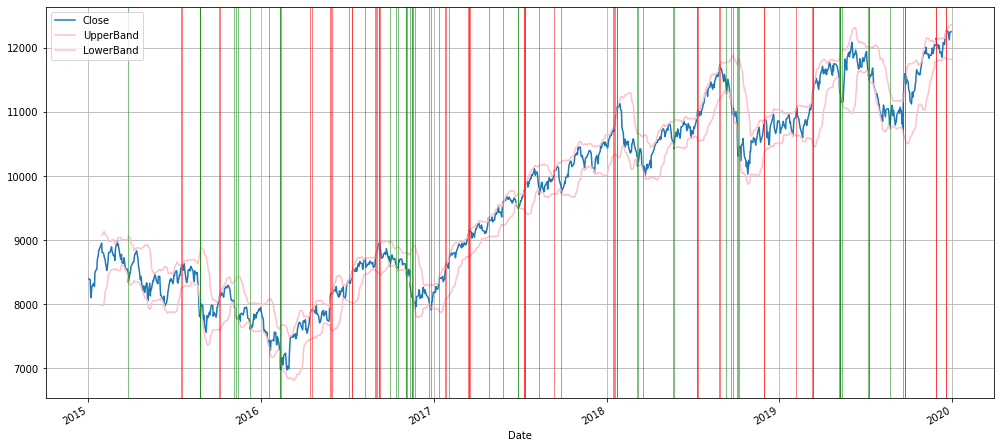

In [7]:
ax=df['Close'].plot(legend=True)
df['UpperBand'].plot(ax=ax, legend=True,color='pink')
df['LowerBand'].plot(ax=ax,legend=True, figsize=(17,8),color='pink')
for ei in df.index:
    if df.loc[ei,'Buy']:
        ax.axvline(x=ei,color='r',ls='-',lw=0.5)
    elif df.loc[ei,'Sell']:
        ax.axvline(x=ei,color='g',ls='-',lw=0.5) 
plt.grid(True)

In [8]:
df['Sum']=0
for j in range(1,11):
    df['Sum']+=df['Close'].shift(-j)-df['Close']
df['Mean_Return_NXT_10D']=abs(df['Sum']/(df['Close']*10))
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,SMA20,StdDev,UpperBand,LowerBand,Buy,Sell,Indicator,BuySignal,SellSignal,Sum,Mean_Return_NXT_10D
Date,,,,,,,,,,,,,,,,,
2019-12-09,11939.099609,11981.950195,11888.049805,11937.500000,11937.500000,600.0,11980.515088,84.453985,12149.423058,11811.607118,0,0,0,0,0,1685.300782,0.014118
2019-12-10,11950.500000,11953.200195,11844.700195,11856.799805,11856.799805,700.0,11977.682568,87.708952,12153.100472,11802.264665,0,0,0,0,0,2850.052732,0.024037
2019-12-11,11867.349609,11923.200195,11832.299805,11910.150391,11910.150391,1000.0,11981.167578,83.240080,12147.647739,11814.687417,0,0,0,0,0,2532.946286,0.021267
2019-12-12,11944.299805,12005.500000,11934.000000,11971.799805,11971.799805,800.0,11986.152588,79.254499,12144.661585,11827.643590,0,0,0,0,0,2190.452146,0.018297
2019-12-13,12026.400391,12098.849609,12023.599609,12086.700195,12086.700195,600.0,11995.715088,79.272450,12154.259988,11837.170188,0,0,0,0,0,1210.597660,0.010016
2019-12-16,12131.349609,12134.650391,12046.299805,12053.950195,12053.950195,400.0,12004.187598,75.736791,12155.661179,11852.714016,0,0,0,0,0,NaN,NaN
2019-12-17,12082.450195,12182.750000,12070.349609,12165.000000,12165.000000,500.0,12015.432617,82.145416,12179.723449,11851.141785,0,0,0,0,0,NaN,NaN
2019-12-18,12197.000000,12237.700195,12163.450195,12221.650391,12221.650391,500.0,12026.560156,94.030252,12214.620661,11838.499652,1,0,1,2000,0,NaN,NaN
2019-12-19,12223.400391,12268.349609,12191.150391,12259.700195,12259.700195,600.0,12041.125147,106.306661,12253.738469,11828.511824,1,0,1,2000,0,NaN,NaN


In [9]:
keep_df=df[['Close','Mean_Return_NXT_10D','Indicator']] 
#slices the DataFrame: to drop last 10 columns
final_df=keep_df[:-10].round({'Close':2,'Mean_Return_NXT_10D':3})
final_df

,Close,Mean_Return_NXT_10D,Indicator
Date,,,
2015-01-02,8395.45,0.011,0
2015-01-05,8378.40,0.007,0
2015-01-06,8127.35,0.031,0
2015-01-07,8102.10,0.042,0
2015-01-08,8234.60,0.031,0
...,...,...,...
2019-12-09,11937.50,0.014,0
2019-12-10,11856.80,0.024,0
2019-12-11,11910.15,0.021,0


In [153]:
X=final_df['Indicator']
Y=final_df['Mean_Return_NXT_10D']
X1=sm.add_constant(X)
reg=sm.OLS(Y,X1).fit()
print(reg.summary())

                             OLS Regression Results                            
Dep. Variable:     Mean_Return_NXT_10D   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.294
Date:                 Sun, 28 Jun 2020   Prob (F-statistic):              0.130
Time:                         17:34:21   Log-Likelihood:                 3779.4
No. Observations:                 1211   AIC:                            -7555.
Df Residuals:                     1209   BIC:                            -7545.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.000     41.55